__Задача 1__

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) найдите:
ковариацию этих двух величин,
коэффициент корреляции Пирсона.
Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.


__Решение__

Формула несмещённой выборочной ковариации: $$\sigma_{XY} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right) \cdot \left( y_i - \overline{Y} \right)$$


In [1]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]


In [2]:
def mean(l: list) -> float:
    """Среднее арифметическое.
    """
    
    return sum(l) / len(l)

In [3]:
def covariance(l1: list, l2: list, unbiased: bool = True) -> float:
    """Выборочная ковариация.
    """

    mean1 = mean(l1)
    mean2 = mean(l2)
    
    l = list(map(lambda x, y: (x - mean1) * (y - mean2), l1, l2))
    
    return sum(l) / (len(l) - int(unbiased))

In [4]:
covariance(salary, scoring)

10175.377777777778

Проверка величины ковариации через Numpy:

In [5]:
import numpy as np
np.cov(salary, scoring, ddof=1)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

Теперь найдем коэффициент корреляции Пирсона:

In [6]:
def variance(l: list, unbiased: bool = True) -> float:
    """Выборочная дисперсия.
    """
    
    mean_ = mean(l)
    l = list(map(lambda x: (x - mean_) ** 2, l))
    
    return sum(l) / (len(l) - int(unbiased))

In [7]:
def std(l: list, unbiased: bool = True) -> float:
    """Выборочное среднее квадратическое отклонение.
    """
    
    return variance(l, unbiased) ** 0.5


In [8]:
def corr(l1: list, l2: list) -> float:
    """Коэффициент корреляции Пирсона.
    """
    
    return covariance(l1, l2) / std(l1) / std(l2)

In [9]:
r = corr(salary, scoring)
r

0.8874900920739162

Проверка величины коэффициента Пирсона через Numpy:

In [10]:
np.corrcoef(salary, scoring)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

__Задача 2__

Проведите тест на значимость коэффициента корреляции Пирсона, найденного в предыдущей задаче. Что для этого нужно знать:
Нулевая гипотеза: реальный коэффициент корреляции равен 0. Альтернативная гипотеза двухсторонняя.
Статистика: t = r * sqrt(n - 2) / sqrt(1 - r ** 2), где r - коэффициент корреляции Пирсона, посчитанный по выборке.
В предположении верности нулевой гипотезы эта статистика имеет распределение Стьюдента с параметром df = n - 2.


__Решение__

Итак, нам нужно проверить гипотезу о том, что коэффициент корреляции Пирсона равен 0 (т.е. что между рассматриваемыми переменными нет никакой зависимости. В этом случае нужно рассмотреть статистику $$t = \dfrac{r \sqrt{n - 2}}{\sqrt{1 - r^2}},$$ где $r$ — посчитанный по выборке коэффициент корреляции, $n$ — число элементов в выборке. В предположении верности нулевой гипотезы эта статистика имеет распределение Стьюдента с $n - 2$ степенями свободы.
Возьмём уровень значимости $\alpha = 0.05$. Построим (двухстороннюю) критическую область. Для этого нам понадобятся квантили:


In [11]:
from scipy import stats

In [12]:
alpha = 0.05
n = len(salary)

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2


(-2.306004135033371, 2.3060041350333704)

Итак, критическая область: $$\Omega_\alpha = \left( -\infty, -2.306 \right) \cup \left( 2.306, \infty \right)$$


In [13]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

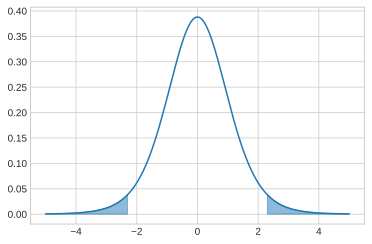

In [14]:
ox = np.linspace(-5, 5, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(ox[0], t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, ox[-1], 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Считаем значение статистики и проводим тест:

In [15]:
t = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)
t

5.447168150485575

Статистика попала в критическую область, следовательно, гипотеза о равенстве нулю корреляции отвергается. Значит, зависимость между выборками значима.

__Задача 3__

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111
Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.


__Решение__

Требуется построить доверительный интервал для нормально распределённой случайной величины с неизвестной дисперсией, поэтому воспользуемся формулой $$P \left( \overline{X} + t_{\alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \right) = p,$$ где $\alpha = 1 - p$, $t_{x}$ — квантиль порядка $x$ для распределения Стьюдента с параметром $df = n - 1$.


In [17]:
samples = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

n = samples.shape[0]
mean = samples.mean()
std = samples.std(ddof=1)
n, mean, std

(10, 118.1, 10.54566788359614)

Найдем квантили:

In [18]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.2621571627409915, 2.2621571627409915)

Тогда доверительный интервал имеет вид:

In [19]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(110.55608365158724, 125.64391634841274)